In [524]:
import pandas as pd
import numpy as np
import os

In [525]:
path = os.path.join("data","Telco_customer_churn.xlsx")
df = pd.read_excel(path)

pd.set_option("display.max_columns",None) # to display all the features available

In [526]:
df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3777,7748-UMTRK,1,United States,California,San Francisco,94132,"37.722302, -122.491129",37.722302,-122.491129,Female,Yes,No,Yes,30,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,2974.5,No,0,34,2440,NaN
4978,9031-ZVQPT,1,United States,California,San Francisco,94109,"37.794487, -122.42227",37.794487,-122.422270,Male,No,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,108.20,7840.6,No,0,57,4773,NaN
4885,0829-XXPLX,1,United States,California,Cutler,93615,"36.497895, -119.285484",36.497895,-119.285484,Female,No,No,No,20,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.40,1871.15,No,0,68,2098,NaN
6391,5774-QPLTF,1,United States,California,El Nido,95317,"37.127386, -120.506422",37.127386,-120.506422,Male,No,Yes,Yes,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.35,938.95,No,0,71,6391,NaN
2047,1984-GPTEH,1,United States,California,Burbank,91506,"34.169706, -118.323548",34.169706,-118.323548,Female,No,No,No,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,25.15,702,No,0,46,5491,NaN
5117,3086-RUCRN,1,United States,California,Paicines,95043,"36.525703, -120.952122",36.525703,-120.952122,Female,No,No,No,66,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),103.10,6595,No,0,46,6183,NaN
5941,6546-OPBBH,1,United States,California,Santa Ana,92704,"33.719869, -117.907063",33.719869,-117.907063,Male,No,Yes,Yes,51,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,23.95,1216.35,No,0,26,5895,NaN
3663,1133-KXCGE,1,United States,California,Palmdale,93552,"34.557711, -118.029441",34.557711,-118.029441,Female,No,No,No,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,407.05,No,0,55,2910,NaN
5725,9233-PSYHO,1,United States,California,Ontario,91762,"34.057256, -117.667677",34.057256,-117.667677,Female,Yes,No,No,45,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),100.15,4459.8,No,0,21,2636,NaN
2820,8985-OOPOS,1,United States,California,Occidental,95465,"38.415003, -122.998726",38.415003,-122.998726,Female,No,No,No,1,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),74.10,74.1,No,0,23,2900,NaN


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

To find all the data types available in a feature

In [528]:
# To find all the data types available in a feature

def check_data_types(df):
   
    data_types_list = []
    
    for column in df.columns:
        data_types = set(df[column].apply(type).unique())
        data_types_list.append((column, data_types))
    
    return data_types_list


result = check_data_types(df)

for feature , datatypes in result:
  print(f"{feature:<20} --- {datatypes}")


CustomerID           --- {<class 'str'>}
Count                --- {<class 'int'>}
Country              --- {<class 'str'>}
State                --- {<class 'str'>}
City                 --- {<class 'str'>}
Zip Code             --- {<class 'int'>}
Lat Long             --- {<class 'str'>}
Latitude             --- {<class 'float'>}
Longitude            --- {<class 'float'>}
Gender               --- {<class 'str'>}
Senior Citizen       --- {<class 'str'>}
Partner              --- {<class 'str'>}
Dependents           --- {<class 'str'>}
Tenure Months        --- {<class 'int'>}
Phone Service        --- {<class 'str'>}
Multiple Lines       --- {<class 'str'>}
Internet Service     --- {<class 'str'>}
Online Security      --- {<class 'str'>}
Online Backup        --- {<class 'str'>}
Device Protection    --- {<class 'str'>}
Tech Support         --- {<class 'str'>}
Streaming TV         --- {<class 'str'>}
Streaming Movies     --- {<class 'str'>}
Contract             --- {<class 'str'>}
Paperless Bi

To check the string values in "Total Changes" feature. Turned out the stings don't hold any value.

In [529]:
for i,v in enumerate(df["Total Charges"]):
        if not isinstance(v, (float,int)):
            print(f"{i} --- {v}")

2234 ---  
2438 ---  
2568 ---  
2667 ---  
2856 ---  
4331 ---  
4687 ---  
5104 ---  
5719 ---  
6772 ---  
6840 ---  


Converting to numeric values and converting the non convertible values to NaN.

In [530]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"] , errors = "coerce")

In [531]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Total percentage of NA values in a feature.

In [532]:
churn_reson_null_percentage = (df.isna().sum()/df.shape[0])*100
for feature,percentage in churn_reson_null_percentage.items():
    if percentage > 0:
        print(f"{feature:<15} ---- {percentage}")
    

Total Charges   ---- 0.1561834445548772
Churn Reason    ---- 73.4630129206304


In [533]:
df.duplicated().sum()

0

In [534]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [535]:
df["Total Charges"].isna().sum()

11

Filling the missing values of "Total charges" feature

In [536]:
df["Total Charges"]=df["Total Charges"].fillna(df["Monthly Charges"]*df["Tenure Months"])
df["Total Charges"].isna().sum()

0

In [537]:
df["Churn Reason"].isna().sum()

5174

Filling the missing values of "Churn Reason" feature

In [538]:
df["Churn Reason"] = df["Churn Reason"].fillna("Not Churned")
df["Churn Reason"].isna().sum()

0

In [539]:
df.isna().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [540]:
categorical_features = df.select_dtypes(include="object")
categorical_features

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
0,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Competitor made better offer
1,9237-HQITU,United States,California,Los Angeles,"34.059281, -118.30742",Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,Moved
2,9305-CDSKC,United States,California,Los Angeles,"34.048013, -118.293953",Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
3,7892-POOKP,United States,California,Los Angeles,"34.062125, -118.315709",Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
4,0280-XJGEX,United States,California,Los Angeles,"34.039224, -118.266293",Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,United States,California,Landers,"34.341737, -116.539416",Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),No,Not Churned
7039,6840-RESVB,United States,California,Adelanto,"34.667815, -117.536183",Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,Not Churned
7040,2234-XADUH,United States,California,Amboy,"34.559882, -115.637164",Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,Not Churned
7041,4801-JZAZL,United States,California,Angelus Oaks,"34.1678, -116.86433",Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Not Churned


In [541]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categorical_features:
     df[feature] = le.fit_transform(df[feature])
     
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,0,0,562,90003,327,33.964131,-118.272783,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,1,86,3239,3
1,6511,1,0,0,562,90005,405,34.059281,-118.307420,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1,67,2701,13
2,6551,1,0,0,562,90006,393,34.048013,-118.293953,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1,1,86,5372,13
3,5604,1,0,0,562,90010,410,34.062125,-118.315709,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1,1,84,5003,13
4,174,1,0,0,562,90015,385,34.039224,-118.266293,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1,1,89,5340,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,1,0,0,521,92285,587,34.341737,-116.539416,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0,0,45,5306,15
7039,4853,1,0,0,2,92301,636,34.667815,-117.536183,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0,0,59,2140,15
7040,1525,1,0,0,22,92304,625,34.559882,-115.637164,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0,0,71,5560,15
7041,3367,1,0,0,26,92305,512,34.167800,-116.864330,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0,0,59,2793,15


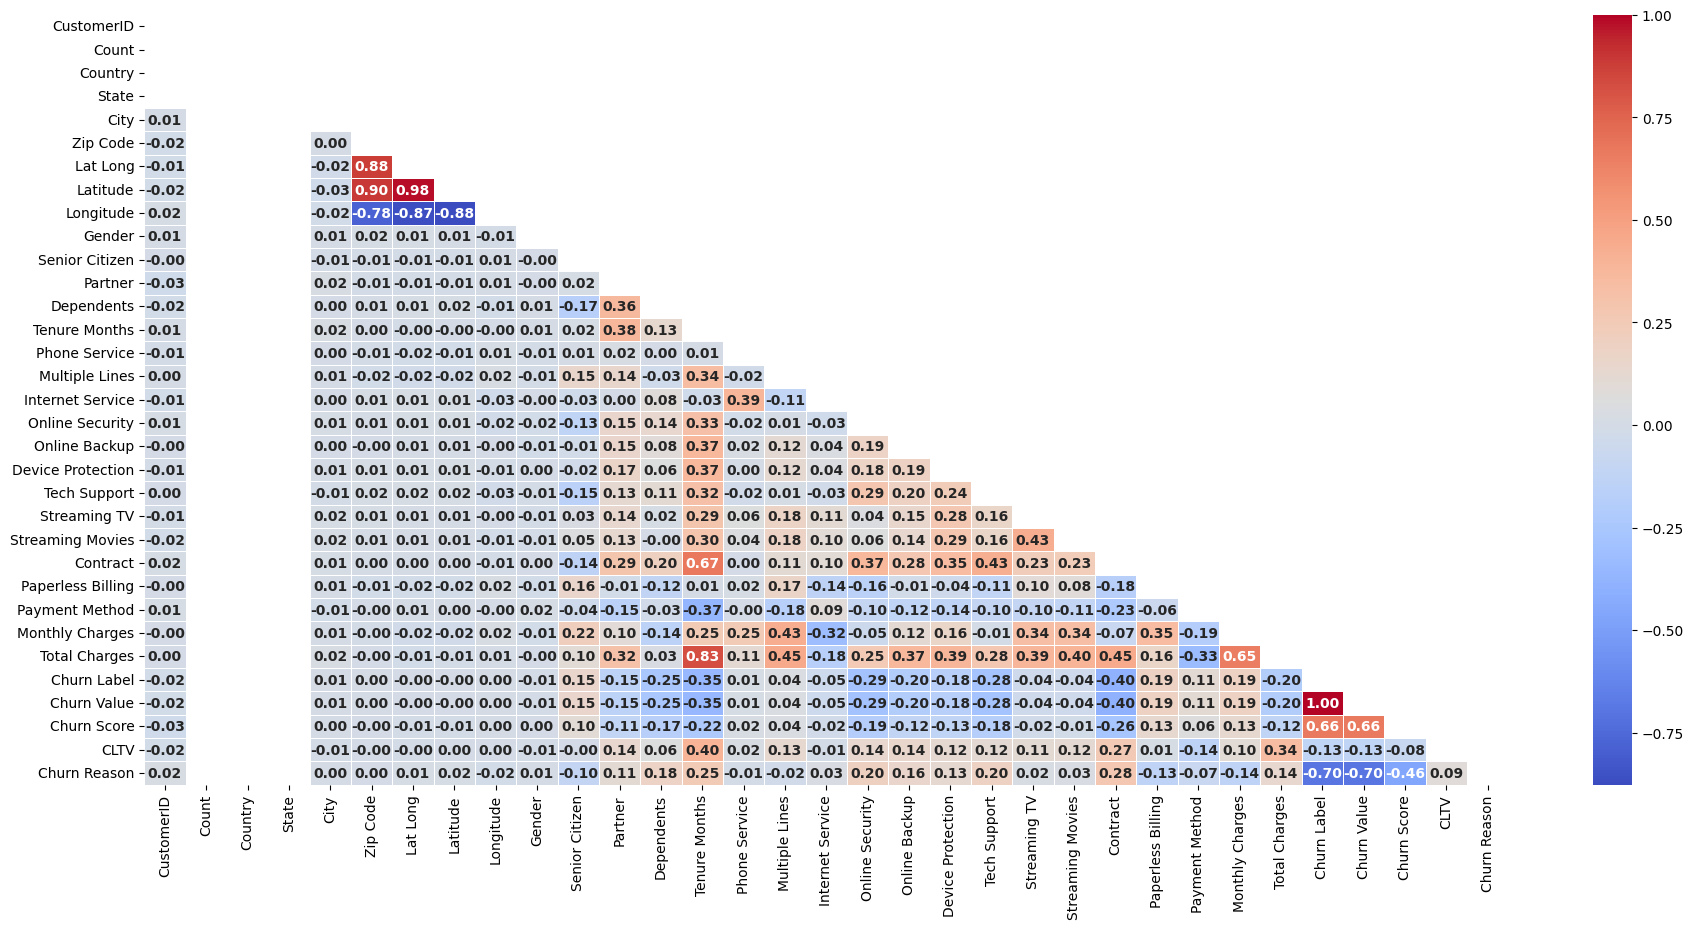

In [542]:
import seaborn as sns
import matplotlib.pyplot as plt

mask= np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot = True,linewidths=0.5,fmt=".2f",mask=mask,annot_kws={"fontsize":10,"fontweight":"bold"},cmap="coolwarm")
plt.show() #plt.cm.Reds


In [543]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
#Loading the dataset

X = df.drop("Churn Value",axis=1)  #Feature Matrix
y = df["Churn Value"]         #Target Variable
reg = LassoCV()
reg.fit(X, y)
print("Best alpha : %f" % reg.alpha_)
print("Best score : %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
selected_features = coef[coef!=0]
selected_features

Best alpha : 0.198480
Best score : 0.659504


CustomerID         8.224466e-07
City               1.426889e-05
Zip Code          -4.671095e-08
Lat Long           6.386094e-06
Tenure Months     -2.006199e-04
Monthly Charges    3.509373e-03
Total Charges     -4.788365e-05
Churn Score        8.713473e-03
Churn Reason      -3.224448e-02
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

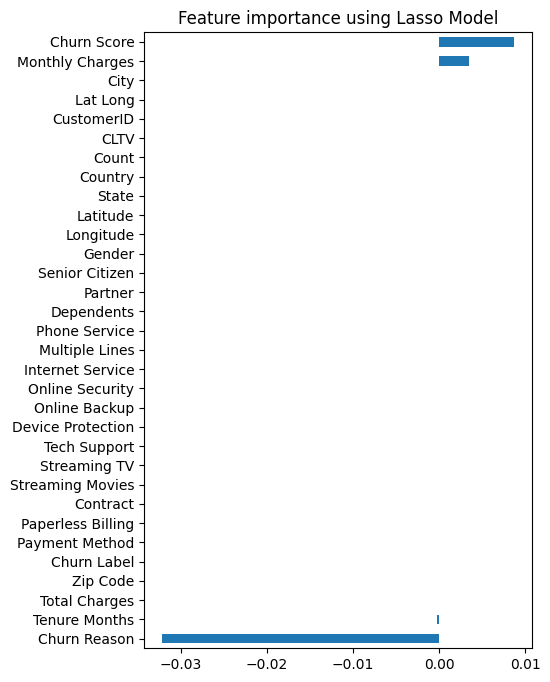

In [544]:
import matplotlib


imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (5.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [545]:
X = df[selected_features.index]
X = X.drop(columns=["CustomerID","Lat Long","Churn Reason"],axis=1)
X

,City,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Score
0,562,90003,2,53.85,108.15,86
1,562,90005,2,70.70,151.65,67
2,562,90006,8,99.65,820.50,86
3,562,90010,28,104.80,3046.05,84
4,562,90015,49,103.70,5036.30,89
...,...,...,...,...,...,...
7038,521,92285,72,21.15,1419.40,45
7039,2,92301,24,84.80,1990.50,59
7040,22,92304,72,103.20,7362.90,71
7041,26,92305,11,29.60,346.45,59


In [546]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [548]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    if model_name in ['SVC', 'KNeighborsClassifier']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        print(f"Accuracy for {model_name}: {accuracy:.4f}")
        print(f"Classification Report for {model_name}:\n{report}")

    else:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        report = classification_report(y_test,y_pred)
        print(f"Accuracy for {model_name}: {accuracy:.4f}")
        print(f"Classification Report for {model_name}:\n{report}")


    

Accuracy for LogisticRegression: 0.8907
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1525
           1       0.81      0.79      0.80       588

    accuracy                           0.89      2113
   macro avg       0.87      0.86      0.86      2113
weighted avg       0.89      0.89      0.89      2113

Accuracy for DecisionTreeClassifier: 0.9025
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1525
           1       0.81      0.85      0.83       588

    accuracy                           0.90      2113
   macro avg       0.88      0.88      0.88      2113
weighted avg       0.90      0.90      0.90      2113

Accuracy for RandomForestClassifier: 0.9200
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0     